## Final Project Submission

Please fill out:
* Student name: Joseph Malombe Ndemei
* Student pace: Part Time
* Scheduled project review date/time: 
* Instructor name: Asha Deen
* Blog post URL:


## MICROSOFT'S MOVIES ANALYSIS

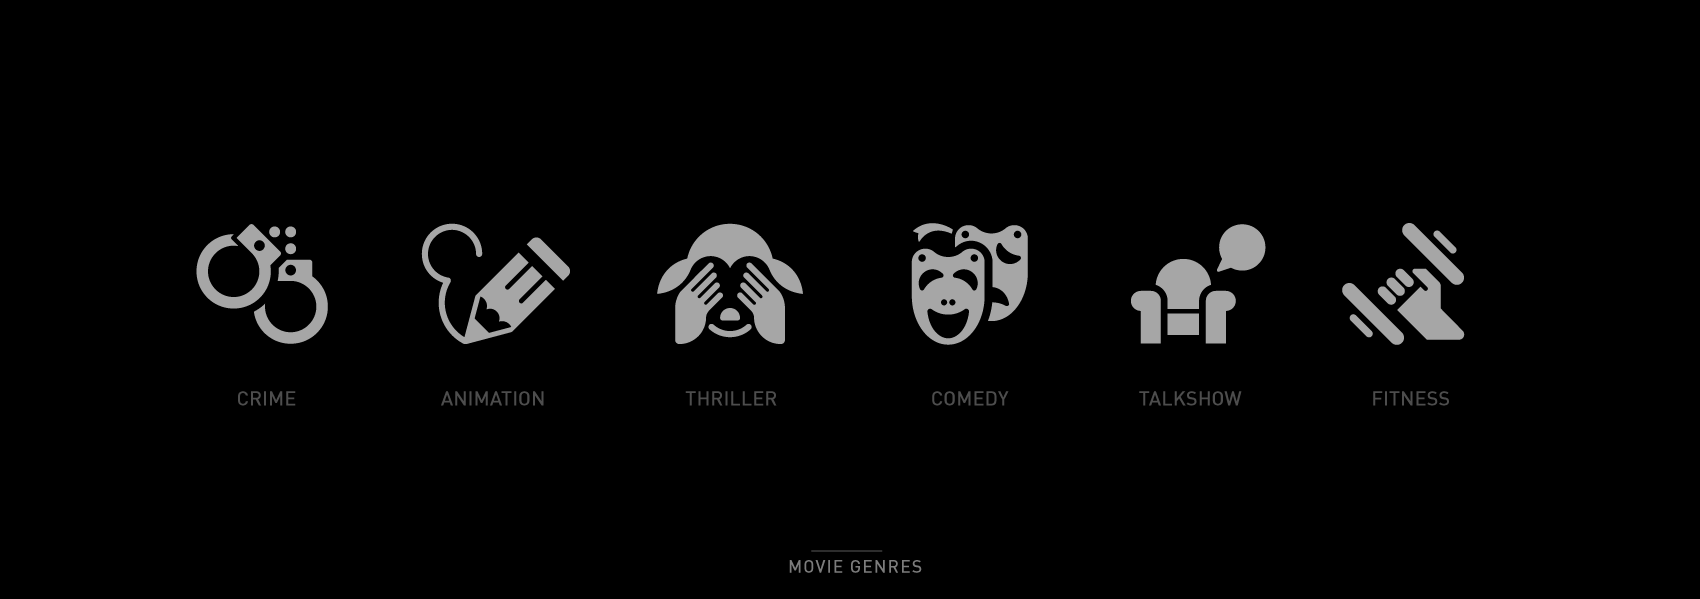

## Overview

This project analyzes the information Microsoft needs to start up it new venture of opening a new movie studio, which is aimed at distributing different genres of movies to the market. 

Analysis on the rating data and total gross data will guide Microsoft on the genres to start with. To make it a profitable venture, they will be required to access in-depth analysis on the basics of movies especially their run-time so as to capture the attention of the viewers.


## Business Problem
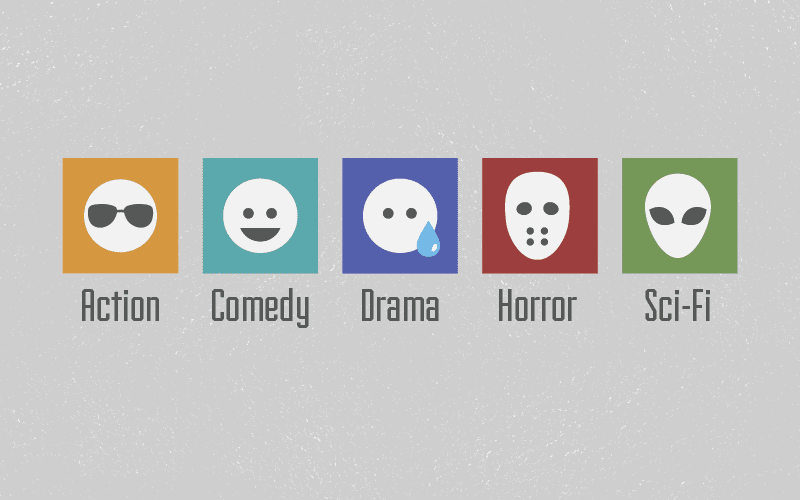

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. This analysis explores the types of films that are currently doing the best at the box office. and translates the findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Data Understanding

[IMDB](https://www.imdb.com/?ref_=nv_home) contains a vast number of movies basic details and ratings from different genres of movies. [The Box Office Mojo by IMDB pro](https://www.boxofficemojo.com/) gives more information on the lifetime grosses of movies. 


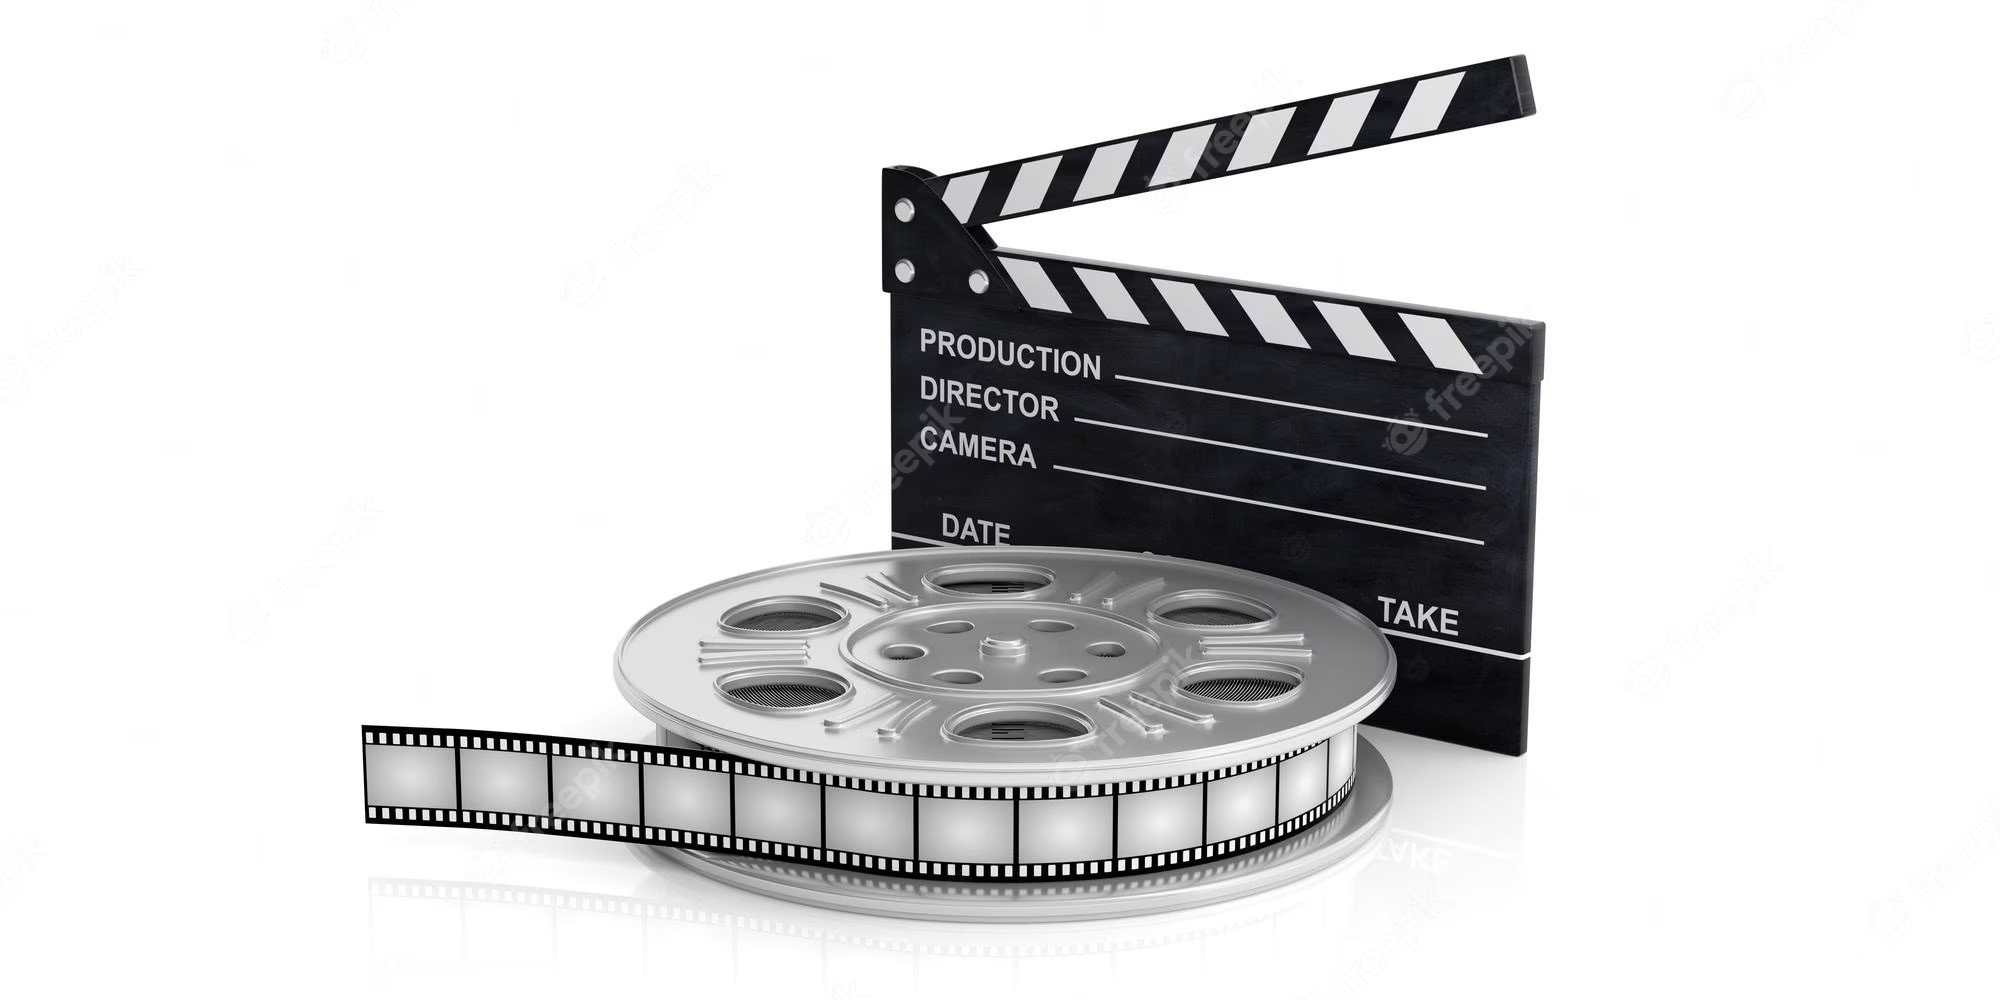

In [1]:
# import the data 

import pandas as pd
import numpy as np

title_basics = pd.read_csv('/Users/PC/Desktop/Project/title.basics.csv', index_col=0)
title_rating = pd.read_csv('/Users/PC/Desktop/Project/title.ratings.csv', index_col=0)
bom_movie_gross = pd.read_csv('/Users/PC/Desktop/Project/bom.movie_gross.csv', index_col=0)

In [2]:
# show title_basics information and printing out the first rows

title_basics.info()
title_basics.shape

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


(146144, 5)

In [3]:
# show title_rating information and printing out the first rows

title_rating.info()
title_rating.shape

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  73856 non-null  float64
 1   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


(73856, 2)

In [4]:
# show bom_movie_gross information and printing out the first rows

bom_movie_gross.info()
bom_movie_gross.shape

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


(3387, 4)

## Title Basics Data

In [5]:
title_basics.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
title_basics.shape

(146144, 5)

In [7]:
# Check for duplicates
title_basics.duplicated().value_counts()

False    146022
True        122
dtype: int64

In [8]:
# Remove duplicate
title_basics = title_basics.drop_duplicates()

In [9]:
title_basics.duplicated().value_counts()

False    146022
dtype: int64

In [10]:
title_basics['genres'].value_counts()

Documentary                    32148
Drama                          21464
Comedy                          9170
Horror                          4367
Comedy,Drama                    3519
                               ...  
Action,Documentary,Fantasy         1
Thriller,War,Western               1
Documentary,News,Sci-Fi            1
Comedy,Documentary,Thriller        1
Action,Horror,Music                1
Name: genres, Length: 1085, dtype: int64

In [11]:
title_basics['start_year'].value_counts()

2017    17480
2016    17253
2018    16835
2015    16226
2014    15584
2013    14704
2012    13781
2011    12898
2010    11842
2019     8366
2020      935
2021       81
2022       26
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

In [12]:
title_basics['runtime_minutes'].value_counts()

90.0     7128
80.0     3523
85.0     2913
100.0    2662
95.0     2548
         ... 
382.0       1
724.0       1
808.0       1
287.0       1
540.0       1
Name: runtime_minutes, Length: 367, dtype: int64

In [13]:
# Detecting missing values
title_basics.isna().sum()

primary_title          0
original_title        21
start_year             0
runtime_minutes    31680
genres              5395
dtype: int64

## Title Rating

In [14]:
title_rating.head()

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [15]:
title_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  73856 non-null  float64
 1   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


In [16]:
title_rating['averagerating'].value_counts()

7.0     2262
6.6     2251
7.2     2249
6.8     2239
6.5     2221
        ... 
9.6       18
10.0      16
9.8       15
9.7       12
9.9        5
Name: averagerating, Length: 91, dtype: int64

In [17]:
title_rating['numvotes'].value_counts()

6        2875
5        2699
7        2476
8        2167
9        1929
         ... 
18286       1
16289       1
1958        1
4007        1
4098        1
Name: numvotes, Length: 7349, dtype: int64

In [18]:
bom_movie_gross

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018


In [19]:
bom_movie_gross['year'].value_counts()

2015    450
2016    436
2012    400
2011    399
2014    395
2013    350
2010    328
2017    321
2018    308
Name: year, dtype: int64

In [20]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


## DATA PREPARATION

# Data Cleaning

In [21]:
#replace all NaN with 0 in bom_movie_gross

bom_movie_gross = bom_movie_gross.fillna(0)

In [22]:
bom_movie_gross

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...
The Quake,Magn.,6200.0,0,2018
Edward II (2018 re-release),FM,4800.0,0,2018
El Pacto,Sony,2500.0,0,2018


In [23]:
# drop primary title column and replace all NaN with 0

title_basics = title_basics.drop(['primary_title'], axis=1)

In [24]:
# Drop all rows with NaN in title_basics

title_basics = title_basics.dropna()
title_basics

,original_title,start_year,runtime_minutes,genres
tconst,,,,
tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,2018,122.0,Drama
tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
tt0111414,A Thin Life,2018,75.0,Comedy
...,...,...,...,...
tt9916160,Drømmeland,2019,72.0,Documentary
tt9916170,O Ensaio,2019,51.0,Drama
tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary


In [25]:
# Replace all NaN with 0 in title_rating

title_rating = title_rating.fillna(0)
title_rating

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21
...,...,...
tt9805820,8.1,25
tt9844256,7.5,24
tt9851050,4.7,14


In [26]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112173 entries, tt0063540 to tt9916538
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   original_title   112173 non-null  object 
 1   start_year       112173 non-null  int64  
 2   runtime_minutes  112173 non-null  float64
 3   genres           112173 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 4.3+ MB


## Merge Datasets

The two data sets title_basics and title_rating have a common column named tconst. combining the data sets will create data that can be used for analysis (for example; compairing genres and average rating)

In [27]:
# create a new dataframe called combined_data that will contain the merged data.
# Specify 'on' ['tconst'] because this is the common column in both dataframes.

combined_data = pd.merge(title_basics, 
                         title_rating, 
                         on=['tconst'], 
                         how='left')
combined_data

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,
tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
tt0111414,A Thin Life,2018,75.0,Comedy,NaN,NaN
...,...,...,...,...,...,...
tt9916160,Drømmeland,2019,72.0,Documentary,6.5,11.0
tt9916170,O Ensaio,2019,51.0,Drama,NaN,NaN
tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary,NaN,NaN


In [28]:
# Clean the data by dropping all NaN in combined_data

combined_data = combined_data.dropna()
combined_data

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,
tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263.0
...,...,...,...,...,...,...
tt9911774,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365.0
tt9913056,Swarm Season,2019,86.0,Documentary,6.2,5.0
tt9913084,Diabolik sono io,2019,75.0,Documentary,6.2,6.0


In [29]:
# renaming the original_title name to match bom_movie_gross column name 'title'

combined_data = combined_data.rename(columns={"original_title": "title"})

In [30]:
# merge combined_data with bom_movie_gross using the column name "title"

final_combined_data = pd.merge(combined_data, 
                         bom_movie_gross, 
                         on=['title'], 
                         how='left')
final_combined_data

,title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,NaN,NaN,NaN,NaN
1,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,NaN,NaN,NaN,NaN
2,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,NaN,NaN,NaN,NaN
3,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,NaN,NaN,NaN,NaN
4,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
65713,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365.0,NaN,NaN,NaN,NaN
65714,Swarm Season,2019,86.0,Documentary,6.2,5.0,NaN,NaN,NaN,NaN
65715,Diabolik sono io,2019,75.0,Documentary,6.2,6.0,NaN,NaN,NaN,NaN
65716,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136.0,NaN,NaN,NaN,NaN


In [31]:
# dropped the NaN to remain with a small group of data that will make analysis easier

final_combined_data = final_combined_data.dropna()
final_combined_data

,title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
23,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378.0,Relbig.,1100000.0,0,2016.0
30,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886.0,IFC,744000.0,8000000,2012.0
34,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,Fox,58200000.0,129900000,2013.0
38,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,Uni.,26300000.0,26900000,2014.0
39,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,Uni.,652300000.0,"1,019.4",2015.0
...,...,...,...,...,...,...,...,...,...,...
64789,Burn the Stage: The Movie,2018,84.0,"Documentary,Music",8.8,2067.0,Trafalgar,4200000.0,16100000,2018.0
64838,Eden,2018,97.0,Drama,6.7,20.0,BG,65500.0,0,2015.0
65181,Neighbors,2018,90.0,"Comedy,Drama",7.6,18.0,Uni.,150200000.0,120500000,2014.0
65235,The Gambler,2019,121.0,"Action,Sci-Fi,Thriller",6.1,10.0,Par.,33700000.0,5600000,2014.0


In [32]:
final_combined_data['genres'].value_counts()

Drama                     192
Comedy,Drama,Romance      121
Documentary                97
Comedy,Drama               95
Comedy                     74
                         ... 
Music                       1
Documentary,Drama,News      1
Sci-Fi                      1
Adventure,Western           1
Action,Drama,Music          1
Name: genres, Length: 291, dtype: int64

In [41]:
# Renaming the genres to get a clear description of the movies

final_combined_data.replace("Action,Crime,Drama", "Action", inplace=True)
final_combined_data.replace("Comedy,Drama", "Comedy", inplace=True)
final_combined_data.replace("Action,Romance", "Action", inplace=True)
final_combined_data.replace("Action,Adventure,Mystery", "Action", inplace=True)
final_combined_data.replace("Comedy,Thriller", "Comedy", inplace=True)
final_combined_data.replace("Action,Romance,Thriller", "Action", inplace=True)
final_combined_data.replace("Action,Drama,Music", "Action", inplace=True)
final_combined_data.replace("Action,Comedy,Thriller", "Action", inplace=True)
final_combined_data.replace("Documentary,Mystery", "Documentary", inplace=True)
final_combined_data.replace("Adventure,History", "Adventure", inplace=True)
final_combined_data.replace("Comedy,Mystery,Sci-Fi", "Comedy", inplace=True)
final_combined_data.replace("Comedy,Crime,History", "Comedy", inplace=True)
final_combined_data.replace("Adventure,Comedy,Music", "Adventure", inplace=True)
final_combined_data.replace("Adventure,Animation,Drama", "Adventure", inplace=True)
final_combined_data.replace("Adventure,Drama", "Adventure", inplace=True)
final_combined_data.replace("Documentary,Drama,Mystery", "Documentary", inplace=True)
final_combined_data.replace("Drama,Fantasy,Thriller", "Drama", inplace=True)
final_combined_data.replace("Adventure,Mystery,Sci-Fi", "Adventure", inplace=True)
final_combined_data.replace("Action,Drama,Western", "Action", inplace=True)
final_combined_data.replace("Documentary,Drama,Music", "Documentary", inplace=True)
final_combined_data.replace("Comedy,History", "Comedy", inplace=True)
final_combined_data.replace("Documentary,Sport", "Documentary", inplace=True)
final_combined_data.replace("Documentary,Drama,News", "Documentary", inplace=True)
final_combined_data.replace("Comedy,Horror,Romance", "Comedy", inplace=True)
final_combined_data.replace("Biography,Drama,Fantasy", "Fantasy", inplace=True)
final_combined_data.replace("Action,History", "Action", inplace=True)
final_combined_data.replace("Animation,Biography,Crime", "Animation", inplace=True)
final_combined_data.replace("Adventure,Documentary,Sport", "Adventure", inplace=True)
final_combined_data.replace("Adventure,Drama", "Adventure", inplace=True)
final_combined_data.replace("Documentary,History,News", "Documentary", inplace=True)
final_combined_data.replace("Drama,Family,Music", "Drama", inplace=True)
final_combined_data.replace("Drama,Fantasy,Sci-Fi", "Drama", inplace=True)
final_combined_data.replace("Action,Comedy,Musical", "Action", inplace=True)
final_combined_data.replace("Action,Biography,History", "Action", inplace=True)
final_combined_data.replace("Action,Comedy,Sport", "Action", inplace=True)
final_combined_data.replace("Fantasy,Horror", "Fantasy", inplace=True)
final_combined_data.replace("Fantasy,Thriller", "Fantasy", inplace=True)
final_combined_data.replace("Crime,Drama,Fantasy", "Fantasy", inplace=True)
final_combined_data.replace("Horror,Music,Thriller", "Horror", inplace=True)
final_combined_data.replace("Action,Drama,Horror", "Action", inplace=True)
final_combined_data.replace("Crime,Documentary,Drama", "Drama", inplace=True)
final_combined_data.replace("Animation,Comedy,Music", "Animation", inplace=True)
final_combined_data.replace("Comedy,Western", "Comedy", inplace=True)
final_combined_data.replace("Drama,Fantasy,Music", "Drama", inplace=True)
final_combined_data.replace("Action,Fantasy,Western", "Action", inplace=True)
final_combined_data.replace("Adventure,Comedy,Sci-Fi", "Adventure", inplace=True)
final_combined_data.replace("Biography,Documentary,Thriller", "Action", inplace=True)
final_combined_data.replace("Animation,Comedy,Crime", "Animation", inplace=True)
final_combined_data.replace("Action,Family,Fantasy", "Action", inplace=True)
final_combined_data.replace("Biography,Drama,Musical", "Drama", inplace=True)
final_combined_data.replace("Biography,Documentary,Family", "Documentary", inplace=True)
final_combined_data.replace("Action,Animation", "Action", inplace=True)
final_combined_data.replace("Drama,Romance", "Drama", inplace=True)
final_combined_data.replace("Adventure,Comedy,Horror", "Adventure", inplace=True)
final_combined_data.replace("Adventure,Family", "Adventure", inplace=True)
final_combined_data.replace("Documentary,Musical", "Documentary", inplace=True)
final_combined_data.replace("Animation,Drama,Sci-Fi", "Animation", inplace=True)
final_combined_data.replace("Biography,Comedy,Documentary", "Documentary", inplace=True)
final_combined_data.replace("Adventure,Western", "Adventure", inplace=True)
final_combined_data.replace("Action,Drama,War", "Action", inplace=True)
final_combined_data.replace("Biography,Crime,Documentary", "Documentary", inplace=True)
final_combined_data.replace("Adventure,Animation,Comedy", "Animation", inplace=True)
final_combined_data.replace("Action,Mystery,Sci-Fi", "Action", inplace=True)
final_combined_data.replace("Biography,History,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Animation,Drama,Fantasy", "Animation", inplace=True)
final_combined_data.replace("Comedy,Crime,Horror", "Adventure", inplace=True)
final_combined_data.replace("Comedy,Mystery,Romance", "Comedy", inplace=True)
final_combined_data.replace("Adventure,Comedy,Romance", "Adventure", inplace=True)
final_combined_data.replace("Animation,Drama,Familyr", "Animation", inplace=True)
final_combined_data.replace("Adventure,Biography,Comedy", "Adventure", inplace=True)
final_combined_data.replace("Documentary,Drama,Family", "Documentary", inplace=True)
final_combined_data.replace("Comedy,Mystery,Romance ", "Comedy", inplace=True)
final_combined_data.replace("Animation,Family", "Animation", inplace=True)
final_combined_data.replace("Action,Biography,Comedy", "Action", inplace=True)
final_combined_data.replace("Adventure,Horror", "Adventure", inplace=True)
final_combined_data.replace("Action,Comedy,War", "Action", inplace=True)
final_combined_data.replace("Action,Documentary,History", "Action", inplace=True)
final_combined_data.replace("Drama,Sport,Thriller", "Action", inplace=True)
final_combined_data.replace("Action,Animation,Crime", "Action", inplace=True)
final_combined_data.replace("Comedy,Sport", "Comedy", inplace=True)
final_combined_data.replace("Drama,Mystery,Western", "Drama", inplace=True)
final_combined_data.replace("Thriller,Western", "Thriller", inplace=True)
final_combined_data.replace("Action,Sport", "Action", inplace=True)
final_combined_data.replace("Adventure,Family,Sci-Fi", "Adventure", inplace=True)
final_combined_data.replace("Comedy,Horror,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Comedy,Crime,Documentary", "Documentary", inplace=True)
final_combined_data.replace("Family,Sport", "Sport", inplace=True)
final_combined_data.replace("Animation,Drama,Family", "Animation", inplace=True)
final_combined_data.replace("Action,Comedy,Fantasy", "Action", inplace=True)
final_combined_data.replace("Crime,Documentary,History", "Documentary", inplace=True)
final_combined_data.replace("Drama,History,Sport", "Sport", inplace=True)
final_combined_data.replace("Adventure,Drama,Sport", "Adventure", inplace=True)
final_combined_data.replace("Animation,Drama", "Animation", inplace=True)
final_combined_data.replace("Comedy,Family,Sci-Fi", "Comedy", inplace=True)
final_combined_data.replace("Animation,Crime,Drama", "Animation", inplace=True)
final_combined_data.replace("Documentary,History,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Animation,Comedy,Drama", "Animation", inplace=True)
final_combined_data.replace("Action,Fantasy,Thriller", "Action", inplace=True)
final_combined_data.replace("Music", "Drama", inplace=True)
final_combined_data.replace("Drama,Musical,Romance", "Drama", inplace=True)
final_combined_data.replace("Biography", "Documentary", inplace=True)
final_combined_data.replace("Family", "Drama", inplace=True)
final_combined_data.replace("Comedy,Musical,Romance", "Comedy", inplace=True)
final_combined_data.replace("Documentary,History,War", "Documentary", inplace=True)
final_combined_data.replace("Documentary,Family", "Documentary", inplace=True)
final_combined_data.replace("Action,Comedy,Family", "Comedy", inplace=True)
final_combined_data.replace("Comedy,Documentary,Drama", "Drama", inplace=True)
final_combined_data.replace("Comedy,Documentary", "Comedy", inplace=True)
final_combined_data.replace("Drama,Sci-Fi", "Drama", inplace=True)
final_combined_data.replace("Adventure,Drama,Sci-Fi", "Adventure", inplace=True)
final_combined_data.replace("Romance,Sci-Fi,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Fantasy,Horror,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Action,Adventure,Western", "Action", inplace=True)
final_combined_data.replace("Action,Sci-Fi", "Action", inplace=True)
final_combined_data.replace("Mystery,Sci-Fi,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Action,Horror,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Documentary,News", "Documentary", inplace=True)
final_combined_data.replace("Comedy,Drama,Romance", "Romance", inplace=True)
final_combined_data.replace("Comedy,Drama,History", "Drama", inplace=True)
final_combined_data.replace("Comedy,Drama,War", "Drama", inplace=True)
final_combined_data.replace("Comedy,Sci-Fi", "Sci-Fi", inplace=True)
final_combined_data.replace("Horror,Romance,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Documentary,Drama,Sport", "Documentary", inplace=True)
final_combined_data.replace("Action,Crime,Mystery", "Action", inplace=True)
final_combined_data.replace("Comedy,Fantasy,Romance", "Romance", inplace=True)
final_combined_data.replace("Comedy,Crime,Romance", "Romance", inplace=True)
final_combined_data.replace("Crime", "Thriller", inplace=True)
final_combined_data.replace("Mystery", "Thriller", inplace=True)
final_combined_data.replace("Mystery,Romance,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Romance,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Action,Animation,Comedy", "Action", inplace=True)
final_combined_data.replace("Action,Biography,Crime", "Action", inplace=True)
final_combined_data.replace("Adventure,Drama,History", "Adventure", inplace=True)
final_combined_data.replace("Documentary,History", "Documentary", inplace=True)
final_combined_data.replace("Crime,Mystery,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Horror,Mystery,Sci-Fi", "Sci-Fi", inplace=True)
final_combined_data.replace("Drama,Romance,War", "Drama", inplace=True)
final_combined_data.replace("Crime,Horror,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Action,Horror,Mystery", "Action", inplace=True)
final_combined_data.replace("Mystery,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Action,Crime", "Action", inplace=True)
final_combined_data.replace("Fantasy,Horror,Mystery", "Fantasy", inplace=True)
final_combined_data.replace("Comedy,Music", "Comedy", inplace=True)
final_combined_data.replace("Biography,Documentary,Mystery", "Documentary", inplace=True)
final_combined_data.replace("Drama,Family,Sport", "Sport", inplace=True)
final_combined_data.replace("Comedy,Drama,Sport", "Comedy", inplace=True)
final_combined_data.replace("Documentary,War", "Documentary", inplace=True)
final_combined_data.replace("Comedy,Family,Fantasy", "Comedy", inplace=True)
final_combined_data.replace("Adventure,Documentary", "Documentary", inplace=True)
final_combined_data.replace("Documentary,Drama", "Documentary", inplace=True)
final_combined_data.replace("Adventure,Drama,Family", "Adventure", inplace=True)
final_combined_data.replace("Biography,Drama,War", "Drama", inplace=True)
final_combined_data.replace("Adventure,Comedy,Fantasy", "Adventure", inplace=True)
final_combined_data.replace("Drama,Music,Musical", "Drama", inplace=True)
final_combined_data.replace("Action,Drama,Family", "Action", inplace=True)
final_combined_data.replace("Comedy,Family,Romance", "Comedy", inplace=True)
final_combined_data.replace("Comedy,Drama,Horror", "Comedy", inplace=True)
final_combined_data.replace("Drama,History,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Action,Adventure,Biography", "Action", inplace=True)
final_combined_data.replace("Action,Drama,Fantasy", "Action", inplace=True)
final_combined_data.replace("Action,Crime,Sci-Fi", "Action", inplace=True)
final_combined_data.replace("Action,Drama,Mystery", "Action", inplace=True)
final_combined_data.replace("Drama,Thriller,War", "Drama", inplace=True)
final_combined_data.replace("Adventure,Drama,Romance", "Adventure", inplace=True)
final_combined_data.replace("Crime,Documentary", "Documentary", inplace=True)
final_combined_data.replace("Adventure,Drama,Western", "Adventure", inplace=True)
final_combined_data.replace("Comedy,Horror", "Horror", inplace=True)
final_combined_data.replace("Adventure,Drama,Mystery", "Adventure", inplace=True)
final_combined_data.replace("Adventure,Fantasy", "Adventure", inplace=True)
final_combined_data.replace("Comedy,Music,Romance", "Romance", inplace=True)
final_combined_data.replace("Action,Adventure", "Action", inplace=True)
final_combined_data.replace("Drama,Sci-Fi,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Crime,Drama,Romance", "Romance", inplace=True)
final_combined_data.replace("Adventure,Animation,Family", "Adventure", inplace=True)
final_combined_data.replace("Biography,Documentary,Sport", "Documentary", inplace=True)
final_combined_data.replace("Comedy,Fantasy,Horror", "Comedy", inplace=True)
final_combined_data.replace("Comedy,Crime,Thriller", "Comedy", inplace=True)
final_combined_data.replace("Horror,Sci-Fi,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Comedy,Mystery", "Comedy", inplace=True)
final_combined_data.replace("Horror,Mystery", "Horror", inplace=True)
final_combined_data.replace("Action,Drama,Romance", "Action", inplace=True)
final_combined_data.replace("Drama,War", "Drama", inplace=True)
final_combined_data.replace("Action,Adventure,Family", "Action", inplace=True)
final_combined_data.replace("Crime,Drama,History", "Crime", inplace=True)
final_combined_data.replace("Crime,Horror,Mystery", "Crime", inplace=True)
final_combined_data.replace("Drama,Mystery", "Drama", inplace=True)
final_combined_data.replace("Drama,Horror,Sci-Fi", "Horror", inplace=True)
final_combined_data.replace("Action,Comedy,Horror", "Horror", inplace=True)
final_combined_data.replace("Biography,Drama,Family", "Drama", inplace=True)
final_combined_data.replace("Drama,History", "Drama", inplace=True)
final_combined_data.replace("Biography,Comedy,Crime", "Crime", inplace=True)
final_combined_data.replace("Comedy,Drama,Musical", "Drama", inplace=True)
final_combined_data.replace("Action,Drama,Sport", "Action", inplace=True)
final_combined_data.replace("Action,Comedy,Sci-Fi", "Sci-Fi", inplace=True)
final_combined_data.replace("Adventure,Comedy,Crime", "Crime", inplace=True)
final_combined_data.replace("Action,Mystery,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Adventure,Drama,Thriller", "Adventure", inplace=True)
final_combined_data.replace("Drama,Romance,Sci-Fi", "Drama", inplace=True)
final_combined_data.replace("Drama,Horror", "Drama", inplace=True)
final_combined_data.replace("Animation,Comedy,Family", "Animation", inplace=True)
final_combined_data.replace("Comedy,Romance,Sport", "Romance", inplace=True)
final_combined_data.replace("Adventure,Drama,Fantasy", "Adventure", inplace=True)
final_combined_data.replace("Drama,Fantasy,Mystery", "Drama", inplace=True)
final_combined_data.replace("Comedy,Fantasy", "Comedy", inplace=True)
final_combined_data.replace("Drama,History,War", "Drama", inplace=True)
final_combined_data.replace("Comedy,Drama,Mystery", "Comedy", inplace=True)
final_combined_data.replace("Adventure,Comedy", "Adventure", inplace=True)
final_combined_data.replace("Drama,History,Romance", "Romance", inplace=True)
final_combined_data.replace("Action,Fantasy,Horror", "Horror", inplace=True)
final_combined_data.replace("Action,Biography,Drama", "Drama", inplace=True)
final_combined_data.replace("Action,Adventure,Horror", "Horror", inplace=True)
final_combined_data.replace("Biography,Documentary,Drama", "Documentary", inplace=True)
final_combined_data.replace("Crime,Drama,Horror", "Crime", inplace=True)
final_combined_data.replace("Crime,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Action,Horror,Sci-Fi", "Sci-Fi", inplace=True)
final_combined_data.replace("Drama,Music,Romance", "Romance", inplace=True)
final_combined_data.replace("Action,Drama,Sci-Fi", "Sci-Fi", inplace=True)
final_combined_data.replace("Drama,Mystery,Sci-Fi", "Sci-Fi", inplace=True)
final_combined_data.replace("Adventure,Biography,Drama", "Adventure", inplace=True)
final_combined_data.replace("Action,Drama,History", "Action", inplace=True)
final_combined_data.replace("Drama,Western", "Drama", inplace=True)
final_combined_data.replace("Drama,Fantasy", "Fantasy", inplace=True)
final_combined_data.replace("Drama,Fantasy,Romance", "Fantasy", inplace=True)
final_combined_data.replace("Biography,Documentary,History", "Documentary", inplace=True)
final_combined_data.replace("Drama,Mystery,Romance", "Romance", inplace=True)
final_combined_data.replace("Biography,Drama,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Action,Comedy,Drama", "Action", inplace=True)
final_combined_data.replace("Adventure,Family,Fantasy", "Adventure", inplace=True)
final_combined_data.replace("Crime,Drama,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Biography,Drama", "Drama", inplace=True)
final_combined_data.replace("Horror,Mystery,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Action,Comedy,Crime", "Crime", inplace=True)
final_combined_data.replace("Biography,Drama,History", "History", inplace=True)
final_combined_data.replace("Action,Adventure,Sci-Fi", "Sci-Fi", inplace=True)
final_combined_data.replace("Drama,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Comedy,Romance", "Romance", inplace=True)
final_combined_data.replace("Biography,Comedy,Drama", "Comedy", inplace=True)
final_combined_data.replace("Comedy,Crime,Drama", "Crime", inplace=True)
final_combined_data.replace("Biography,Comedy,Drama", "Comedy", inplace=True)
final_combined_data.replace("Action,Thriller", "Action", inplace=True)
final_combined_data.replace("Action,Adventure,Comedy", "Adventure", inplace=True)
final_combined_data.replace("Horror,Thriller", "Horror", inplace=True)
final_combined_data.replace("Action,Crime,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Action,Adventure,Drama", "Adventure", inplace=True)
final_combined_data.replace("Action,Adventure,Fantasy", "Fantasy", inplace=True)
final_combined_data.replace("Biography,Drama,Romance", "Romance", inplace=True)
final_combined_data.replace("Biography,Crime,Drama", "Crime", inplace=True)
final_combined_data.replace("Action,Drama,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Crime,Drama,Mystery", "Crime", inplace=True)
final_combined_data.replace("Crime,Drama", "Crime", inplace=True)
final_combined_data.replace("Action,Adventure,Animation", "Animation", inplace=True)
final_combined_data.replace("Adventure,Comedy,Drama", "Adventure", inplace=True)
final_combined_data.replace("Action,Adventure,Thriller", "Action", inplace=True)
final_combined_data.replace("Drama,Mystery,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Drama,Horror,Thriller", "Horror", inplace=True)
final_combined_data.replace("Action,Comedy", "Action", inplace=True)
final_combined_data.replace("Comedy,Drama,Music", "Comedy", inplace=True)
final_combined_data.replace("Biography,Documentary", "Documentary", inplace=True)
final_combined_data.replace("Drama,Horror,Mystery", "Horror", inplace=True)
final_combined_data.replace("Drama,Family", "Drama", inplace=True)
final_combined_data.replace("Drama,Music", "Drama", inplace=True)
final_combined_data.replace("Comedy,Drama,Family", "Comedy", inplace=True)
final_combined_data.replace("Documentary,Music", "Documentary", inplace=True)
final_combined_data.replace("Biography,Drama,Sport", "Drama", inplace=True)
final_combined_data.replace("Comedy,Crime", "Crime", inplace=True)
final_combined_data.replace("Action,Adventure,Crime", "Crime", inplace=True)
final_combined_data.replace("Adventure,Comedy,Family", "Adventure", inplace=True)
final_combined_data.replace("Drama,Fantasy,Horror", "Horror", inplace=True)
final_combined_data.replace("Biography,Drama,Music", "Drama", inplace=True)
final_combined_data.replace("Comedy,Drama,Fantasy", "Fantasy", inplace=True)
final_combined_data.replace("Action,Drama", "Action", inplace=True)
final_combined_data.replace("Comedy,Family", "Comedy", inplace=True)
final_combined_data.replace("Drama,Romance,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Drama,Sport", "Drama", inplace=True)
final_combined_data.replace("Biography,Documentary,Music", "Documentary", inplace=True)
final_combined_data.replace("Action,Sci-Fi,Thriller", "Thriller", inplace=True)
final_combined_data.replace("Action,Comedy,Romance", "Romance", inplace=True)



final_combined_data['genres'].value_counts()

Drama                              445
Thriller                           445
Comedy                             284
Romance                            248
Action                             208
Documentary                        191
Adventure                          160
Horror                             123
Animation                          103
Sci-Fi                              78
Fantasy                             64
History                             39
Sport                                5
Adventure,Biography,Documentary      2
Documentary,Drama,Romance            1
Comedy,Crime,Mystery                 1
Action,Crime,Horror                  1
Adventure,Crime,Drama                1
Adventure,Drama,Horror               1
Name: genres, dtype: int64

In [34]:
# Save final_combined_data  as CSV
final_combined_data.to_csv('/Users/PC/Desktop/Project/final_combined_data.to_csv')

## Analysis

In [35]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Runtime of Movies

The runtime of the movie mainly depends on the genre of the movie and the targeted audience. Most movies will run for approximately 90-100 minutes.

In [36]:
# show the overall statistics

combined_data['runtime_minutes'].describe()

count    65718.000000
mean        94.732798
std        209.380177
min          3.000000
25%         81.000000
50%         91.000000
75%        104.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

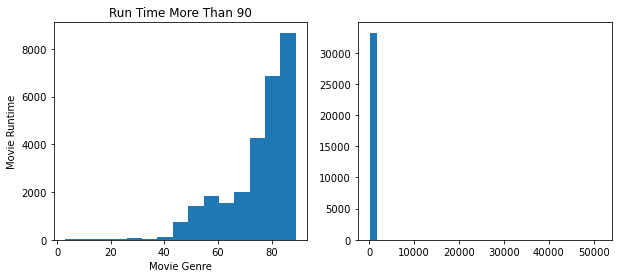

In [37]:
# create a plot

movie_length_fig, movie_length_axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

movie_length_axes[0].set_title('Run Time Less Than 90')
movie_length_axes[0].set_ylabel('Movie Runtime')
movie_length_axes[0].set_xlabel('Movie Genre')

movie_length_axes[0].set_title('Run Time More Than 90')
movie_length_axes[0].set_ylabel('Movie Runtime')
movie_length_axes[0].set_xlabel('Movie Genre')

movie_length_less = combined_data['runtime_minutes'][combined_data['runtime_minutes'] < 90]
movie_length_more = combined_data['runtime_minutes'][combined_data['runtime_minutes'] > 90]

movie_length_axes[0].hist(movie_length_less, bins=15)
movie_length_axes[1].hist(movie_length_more, bins=30)

plt.show()

## Domestic Gross

It is easier for a company to first test run it's first venture in an environment they are close to. Understanding the needs of the home ground makes it easier to expand the business idea to the rest of the world.

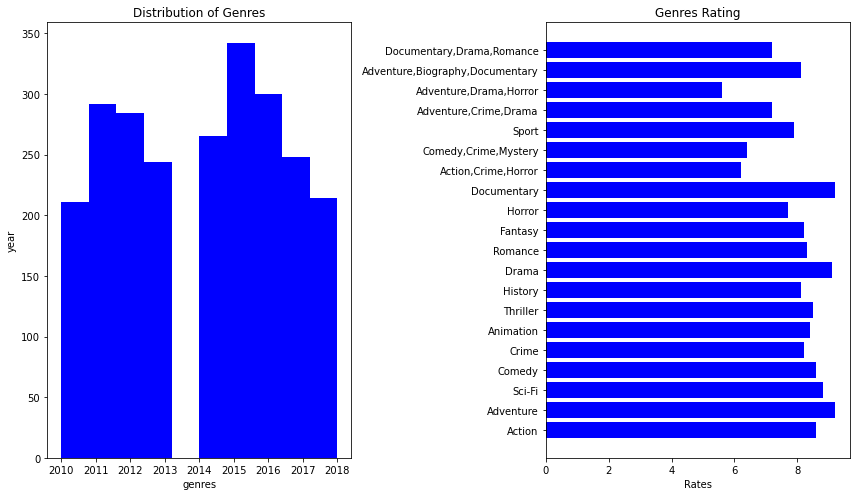

In [38]:
# Set up figure and axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 7))
fig.set_tight_layout(True)

genres = final_combined_data['genres']
year = final_combined_data['year']
averagerating = final_combined_data['averagerating']

# Histogram of Genres and Years
ax1.hist(x=year, color="blue")
ax1.set_xlabel("genres")
ax1.set_ylabel("year")
ax1.set_title("Distribution of Genres")

# Horizontal Bar Graph of Rating by Genres
ax2.barh(genres, averagerating, color="blue")
ax2.set_xlabel("Rates")
ax2.set_title("Genres Rating");

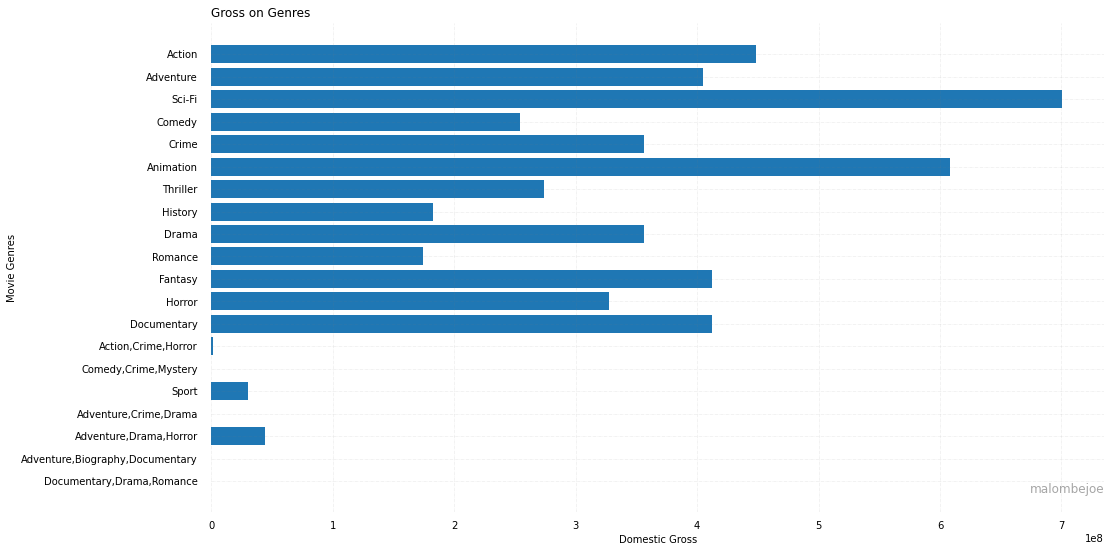

In [39]:
# create plot
genres = final_combined_data['genres']
gross = final_combined_data['domestic_gross']
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(genres, gross)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Adding padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Adding x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add Plot Title
ax.set_title('Gross on Genres',
             loc ='left', )

# setting y_label as Domestic Gross
plt.xlabel("Domestic Gross")
 
# setting y_label as Movie Genres
plt.ylabel("Movie Genres")
 
# Add Text watermark
fig.text(0.9, 0.15, 'malombejoe', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

## Conclusions

This analysis leads to these recommendations;

- **Invest on Sci-Fi Movies.** Taking note that they are they attracted a high gross in all genres, they can be used for a start to guarantee profits.
- **Adventure, Drama and Documentaries have been the most rated genres.** To receive high ratings means they were loved by the majority of the viewers. These genres are highly likely to have a huge outreach.
